# Exercise Kyphosis

In this exercise we'll work with data about Kyphosis pain, original source of the data can be found in: https://www.kaggle.com/code/srolka/kyphosis-decision-tree-and-random-forest/data

Kyphosis is a medical condition that causes a forward curving of the back. It can occur at any age but is most common in older women. Here, the data frame has 81 rows and 4 columns . representing data on patients who have had corrective spinal surgery

Data contains the following columns:
* Kyphosis:
    * absent
    * present
* Age:
    * In months
* Number:
    * From 2 to 10
    * The number of vertebrae involved
* Start:
    * From 1 to 18
    * The number of the first vertebra operated on.

With the following data you should be able to do:
* Explore the data
* Perform a data pre-processing
* Use Decission Tree model
* Evaluate the model with confussion matrix 
* Evaluate the model with classification report

## Solution

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.metrics import confusion_matrix, classification_report

## EDA

In [2]:
# Read data
df = pd.read_csv("Files/kyphosis.csv")
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [4]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [5]:
df.Kyphosis.value_counts()

Kyphosis
absent     64
present    17
Name: count, dtype: int64

In [6]:
df.Kyphosis.value_counts() / len(df)* 100 # Unbalanced data

Kyphosis
absent     79.012346
present    20.987654
Name: count, dtype: float64

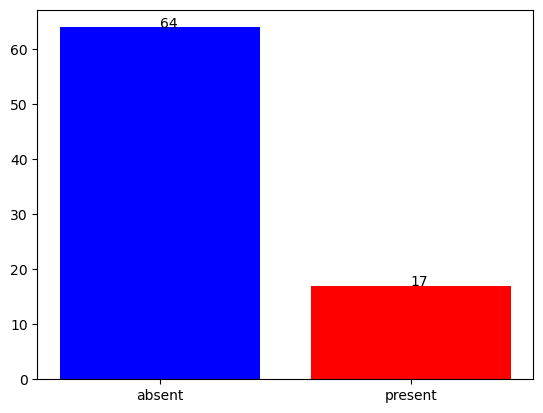

In [7]:
plt.bar(df.Kyphosis.value_counts().keys(), 
        df.Kyphosis.value_counts().values,
        color = ["blue", "red"])

for i in range(len(df.Kyphosis.value_counts())):
    plt.text(df.Kyphosis.value_counts().keys()[i], 
             df.Kyphosis.value_counts().values[i],
             str(df.Kyphosis.value_counts().values[i]))

c:\Users\Luciano Gabbanelli\anaconda3\envs\Assembler\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


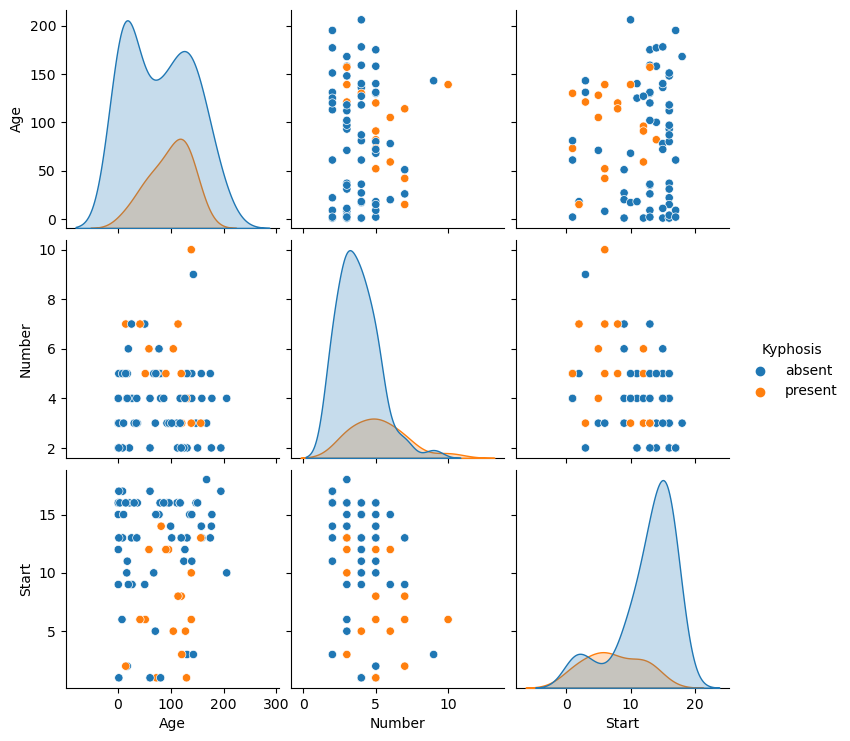

In [8]:
sns.pairplot(data=df,
             hue = "Kyphosis")

## Pre-Processing

In [9]:
# X set
X = df.drop(columns=["Kyphosis"])

# Y set
df.Kyphosis.replace({
    "absent" : 0,
    "present" : 1
}, inplace = True)

Y = df.Kyphosis
Y[:10]

0    0
1    0
2    1
3    0
4    0
5    0
6    0
7    0
8    0
9    1
Name: Kyphosis, dtype: int64

In [10]:
# Normalize data
sc = StandardScaler()
X = sc.fit_transform(X)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify= Y)

## Decission Tree Model

In [12]:
# Train
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

# Predict
y_pred = tree.predict(X_test)

## Metrics

<Axes: >

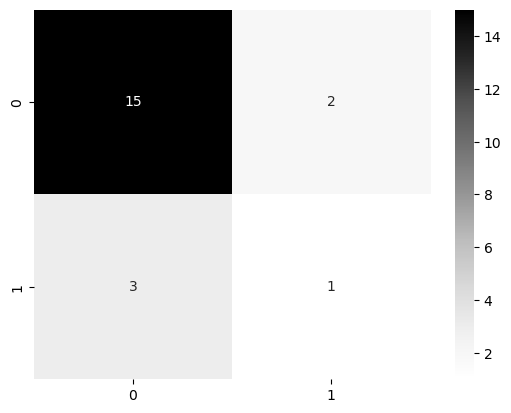

In [13]:
# Confussion Matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Greys")

In [14]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86        17
           1       0.33      0.25      0.29         4

    accuracy                           0.76        21
   macro avg       0.58      0.57      0.57        21
weighted avg       0.74      0.76      0.75        21



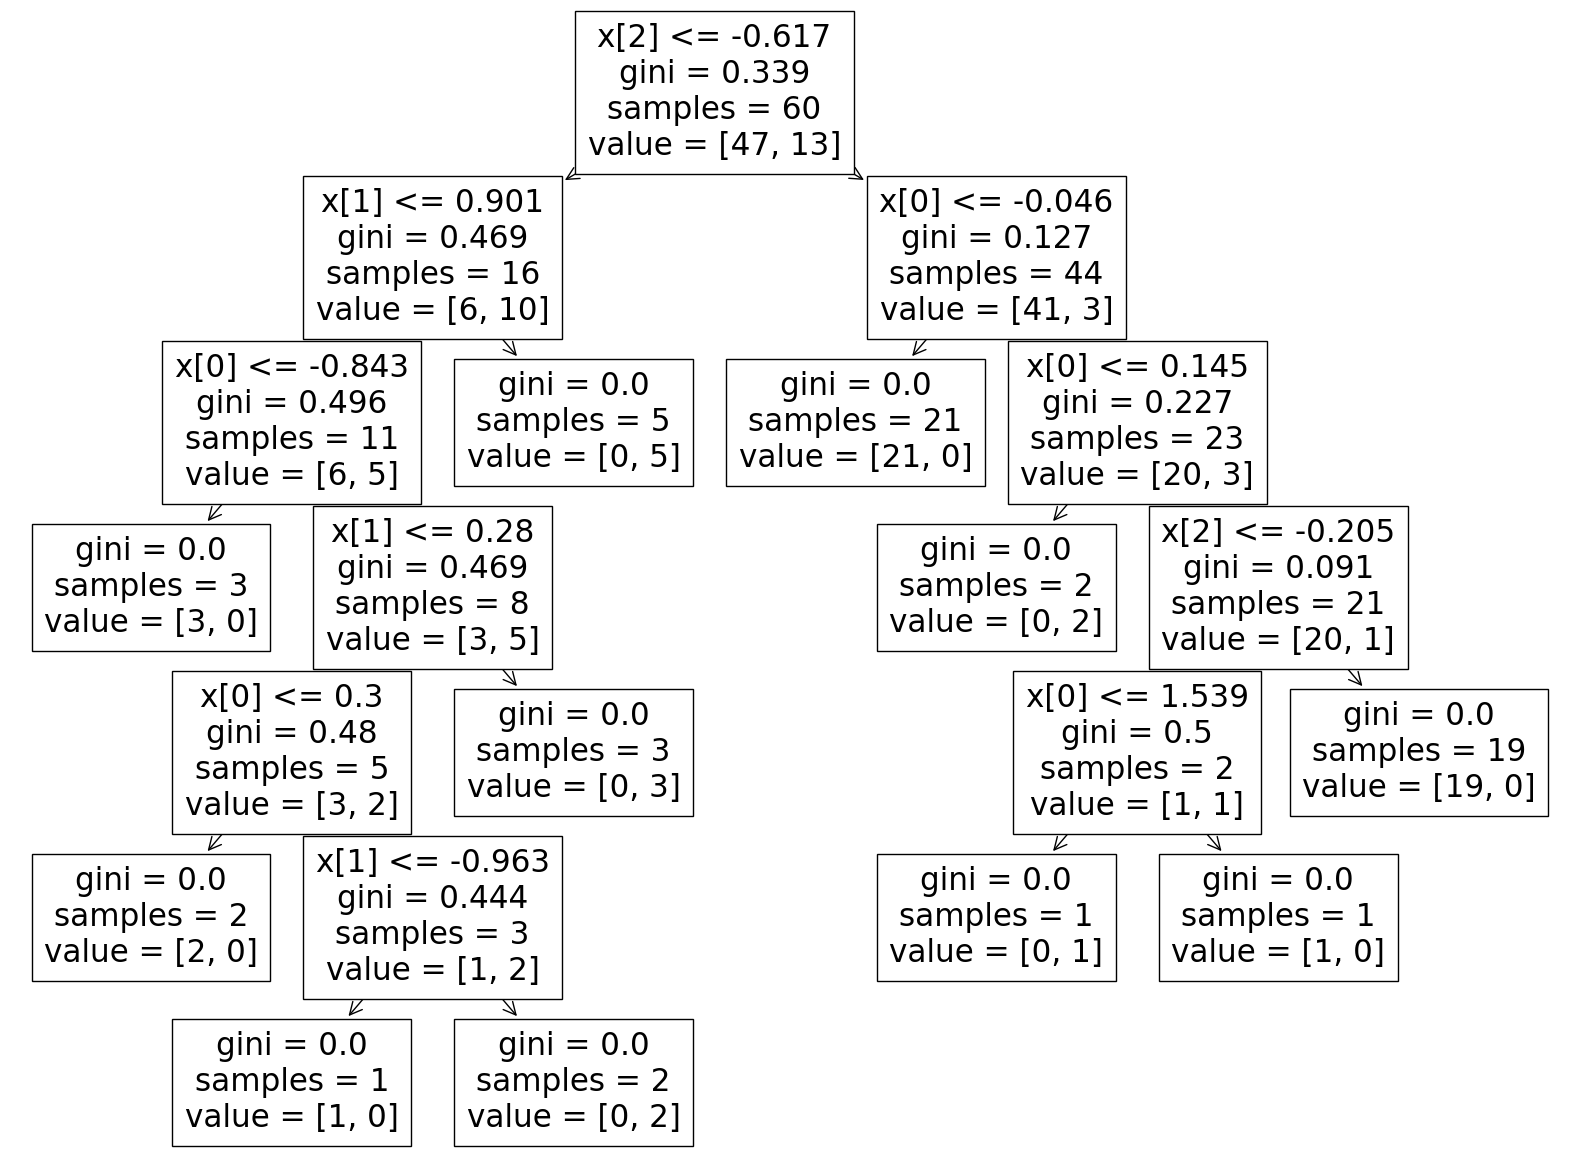

In [15]:
plt.figure(figsize=(20, 15))
plot_tree(tree)
plt.show()